<a href="https://colab.research.google.com/github/CamillaSemenzzatt/HAPPY-LIFE-INSIGHTS---Projeto-aplicado-II/blob/main/Nivel_de_instrucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Download the Excel file from GitHub.
!wget -O instrução_de_municipio.xlsx 'https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/e5aa9944f998974fa39c26f3c56d4f9f3d5b1c99/tabela4095.xlsx'

# Read the Excel file into a Pandas DataFrame.
tabela = pd.read_excel('instrução_de_municipio.xlsx')  # Remove the extra indent here

# Print the DataFrame.
print(tabela)  # Remove the extra indent here if it exists

--2025-03-23 16:14:50--  https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/e5aa9944f998974fa39c26f3c56d4f9f3d5b1c99/tabela4095.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141352 (138K) [application/octet-stream]
Saving to: ‘instrução_de_municipio.xlsx’

instrução_de_munici 100%[===================>] 138.04K  --.-KB/s    in 0.03s   

2025-03-23 16:14:50 (5.08 MB/s) - ‘instrução_de_municipio.xlsx’ saved [141352/141352]

      Tabela 4095 - Pessoas de 14 anos ou mais de idade, total, na força de trabalho, ocupadas, desocupadas, fora da força de trabalho, em situação de informalidade e respectivas taxas e níveis, por nível de instrução  \
0      Variável - Pessoas de 14 anos ou mais de idade...                                     

In [ ]:
tabela = tabela.drop([0, 1])
tabela = tabela.reset_index(drop=True)

tabela = tabela.rename(columns={
    'Tabela 4095 - Pessoas de 14 anos ou mais de idade, total, na força de trabalho, ocupadas, desocupadas, fora da força de trabalho, em situação de informalidade e respectivas taxas e níveis, por nível de instrução': 'municipio',
    'Unnamed: 1': 'trimestre',
    'Unnamed: 2': 'Nivel de Instrução',
    'Unnamed: 3': 'quantidade'
})

ultima_palavra_valida = {coluna: None for coluna in tabela.columns}

for index, row in tabela.iterrows():
    for coluna in tabela.columns:
        if pd.isnull(row[coluna]):
            if ultima_palavra_valida[coluna] is not None:
                row[coluna] = ultima_palavra_valida[coluna]
        else:
            ultima_palavra_valida[coluna] = row[coluna]
            for outra_coluna in tabela.columns:
                if outra_coluna != coluna and pd.isnull(row[outra_coluna]):
                    ultima_palavra_valida[outra_coluna] = None

tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)

tabela = tabela.drop(tabela.index[-1])

<ipython-input-7-4e84180ae91e>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)


In [ ]:
from tabulate import tabulate

tabela_lista = tabela.values.tolist()

tabela_lista.insert(0, tabela.columns.tolist())

print(tabulate(tabela_lista, headers="firstrow", tablefmt="grid"))

+---------------------+-------------------+----------------------------------------------+--------------+
| municipio           | trimestre         | Nivel de Instrução                           |   quantidade |
+=====================+===================+==============================================+==============+
| Porto Velho (RO)    | 1º trimestre 2012 | Sem instrução e menos de 1 ano de estudo     |           13 |
+---------------------+-------------------+----------------------------------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | Ensino fundamental incompleto ou equivalente |           97 |
+---------------------+-------------------+----------------------------------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | Ensino fundamental completo ou equivalente   |           47 |
+---------------------+-------------------+----------------------------------------------+--------------+
| Porto Velho (RO)    | 1º trimestre 2012 | En

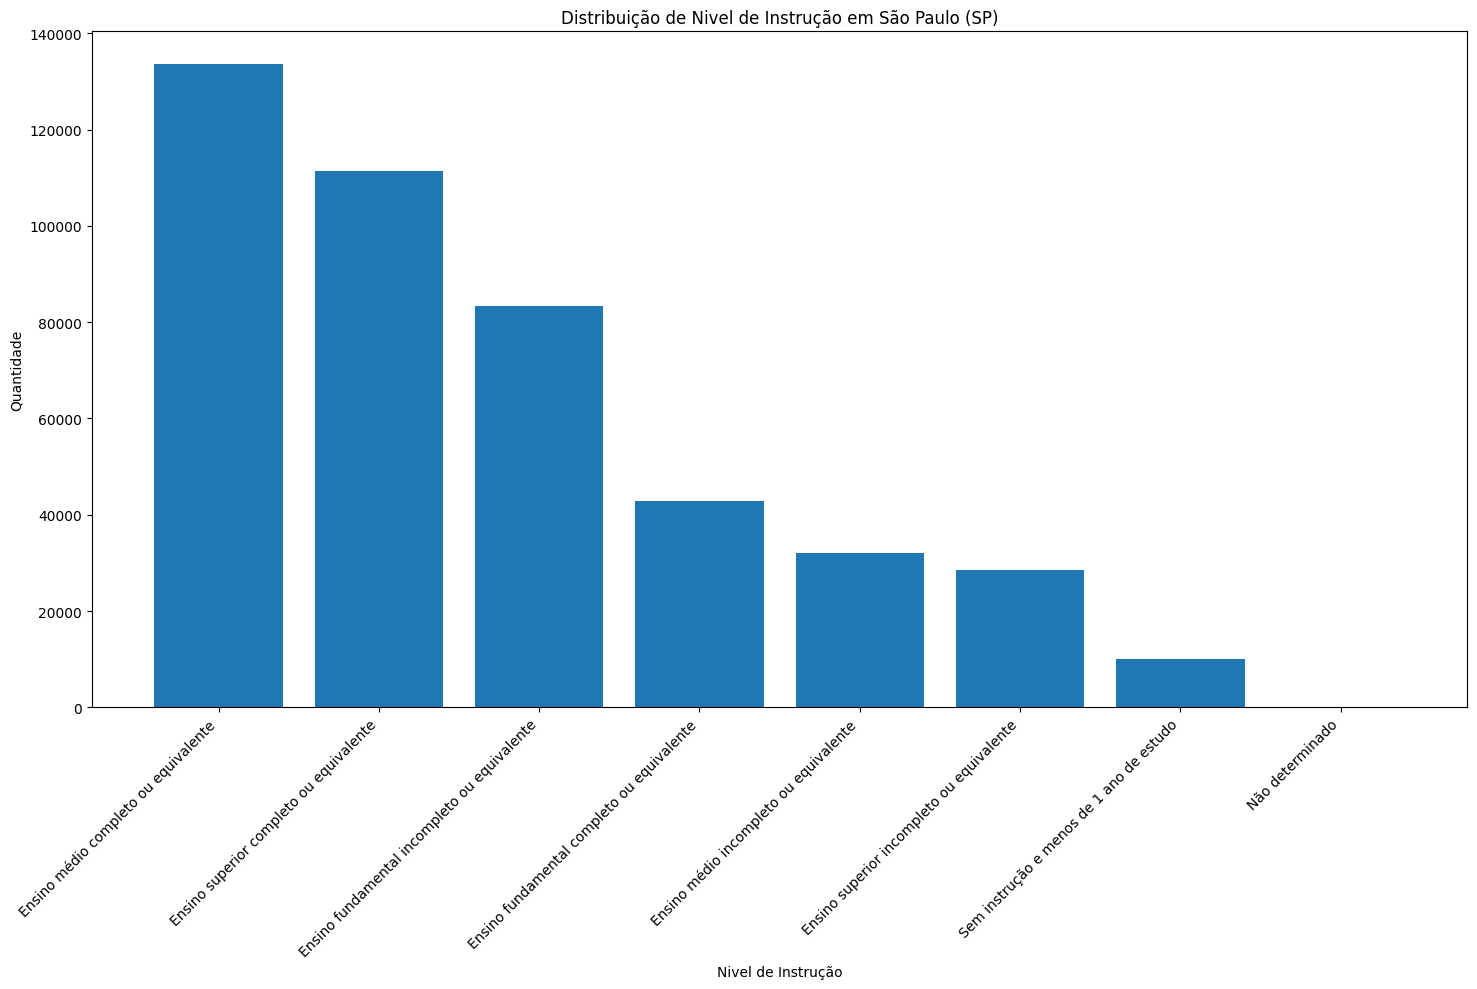

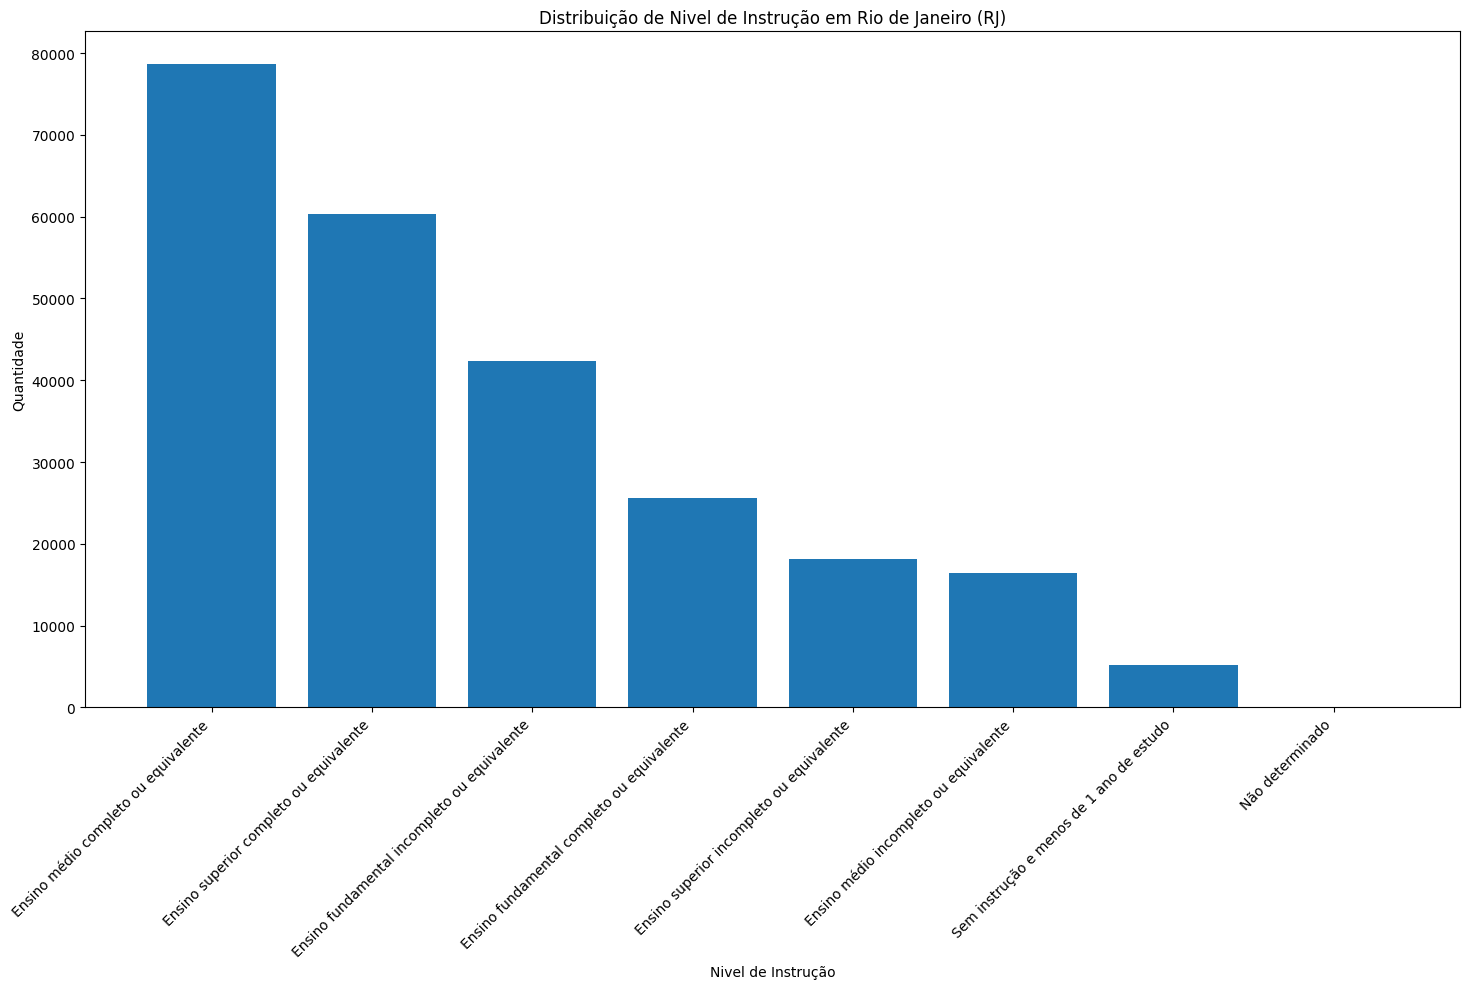

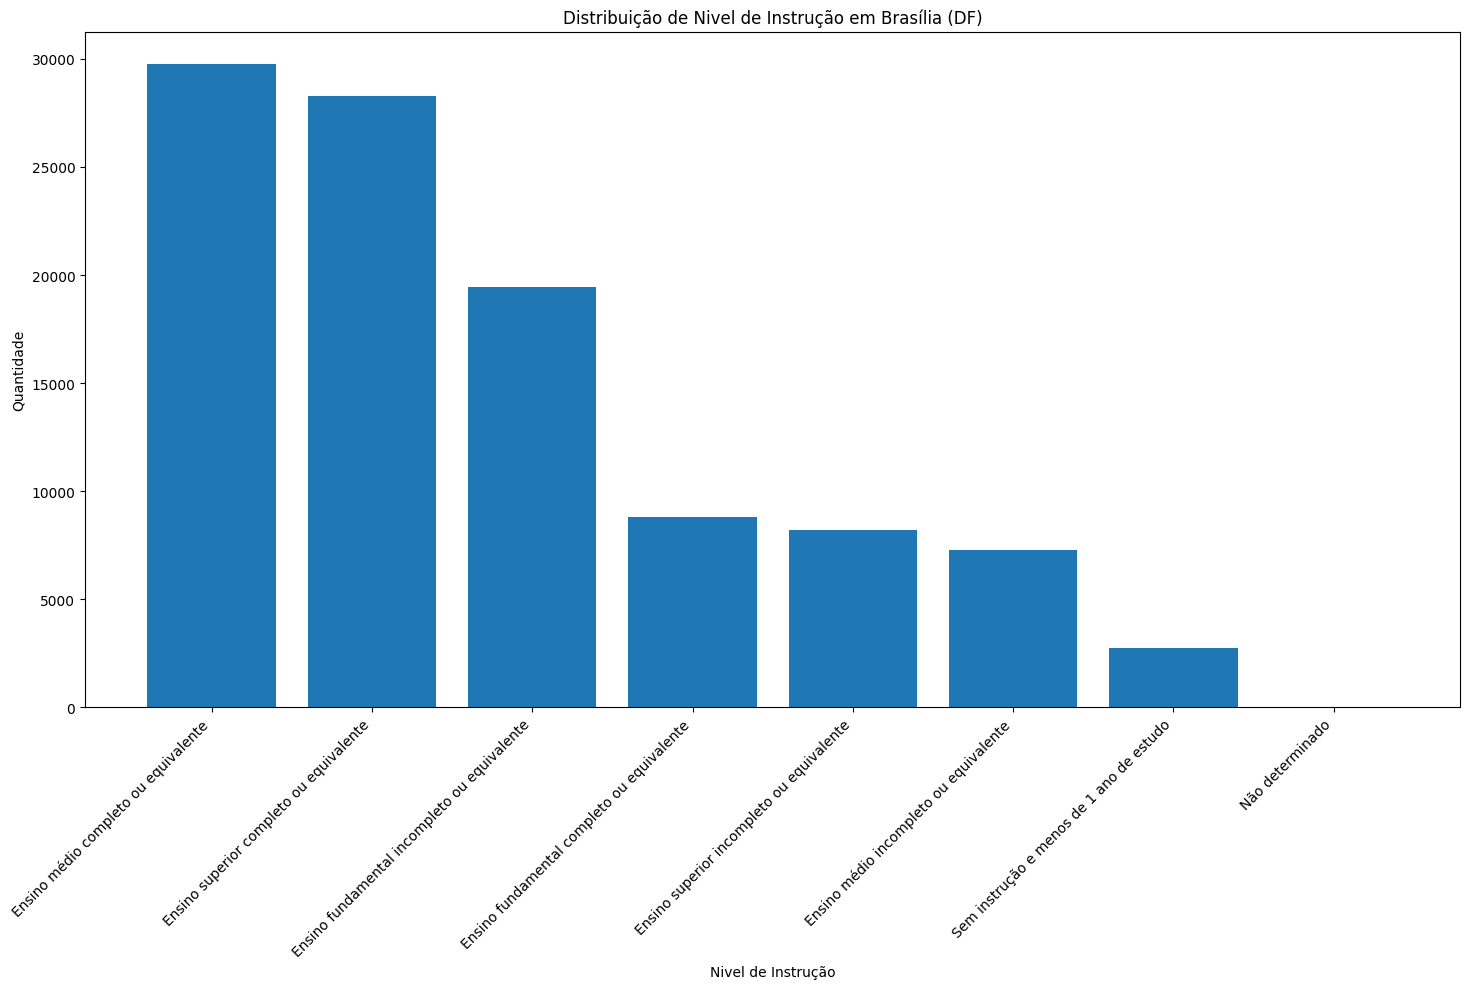

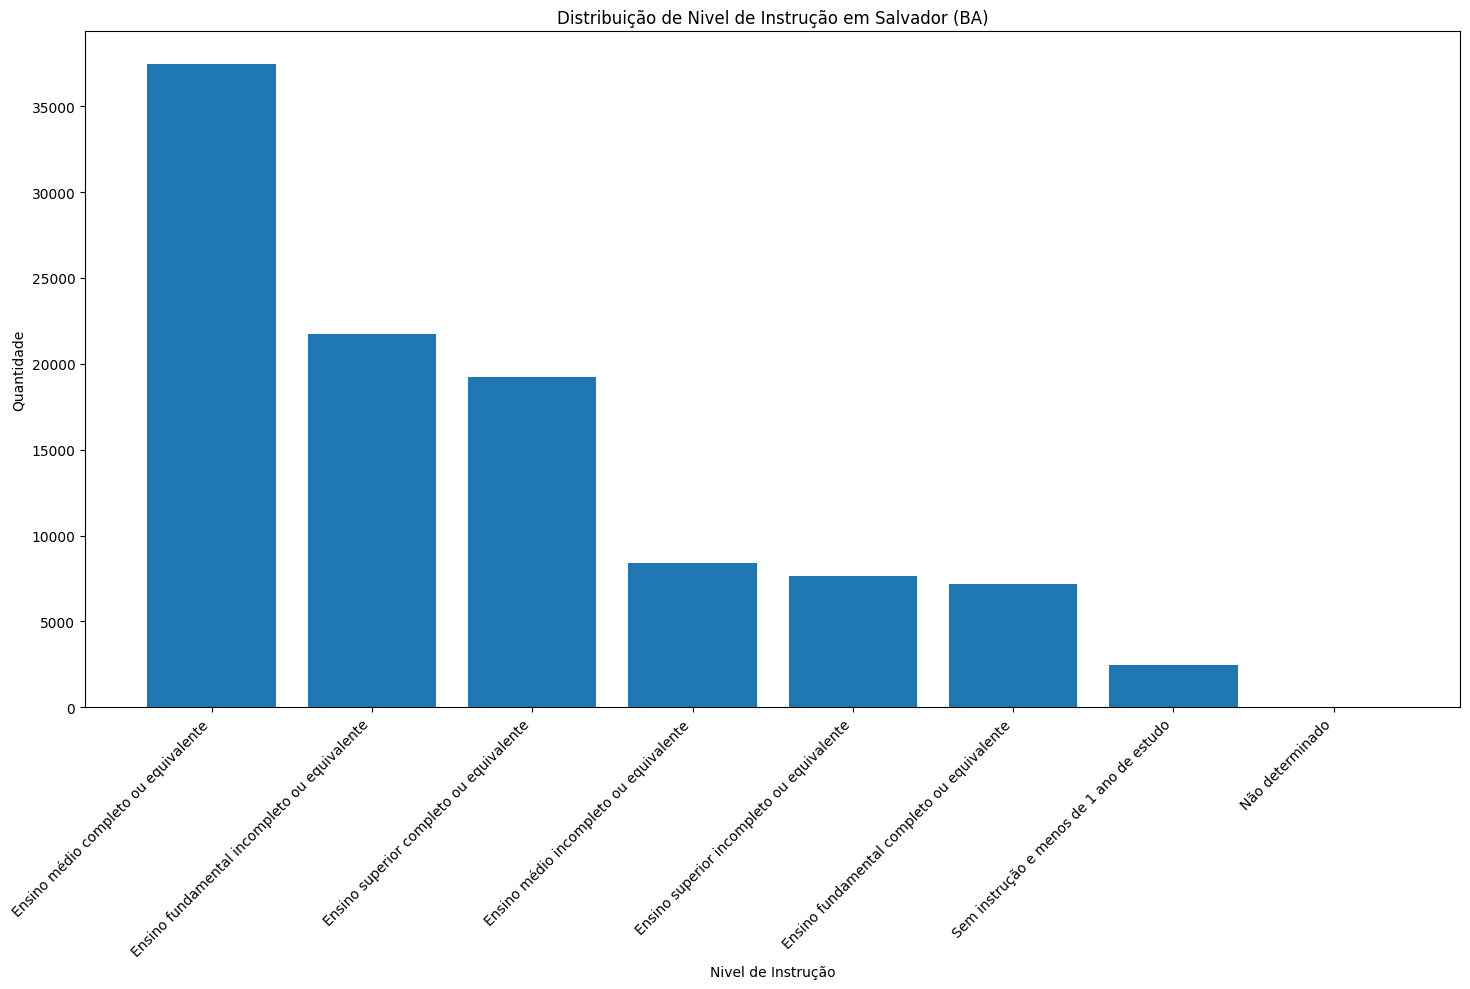

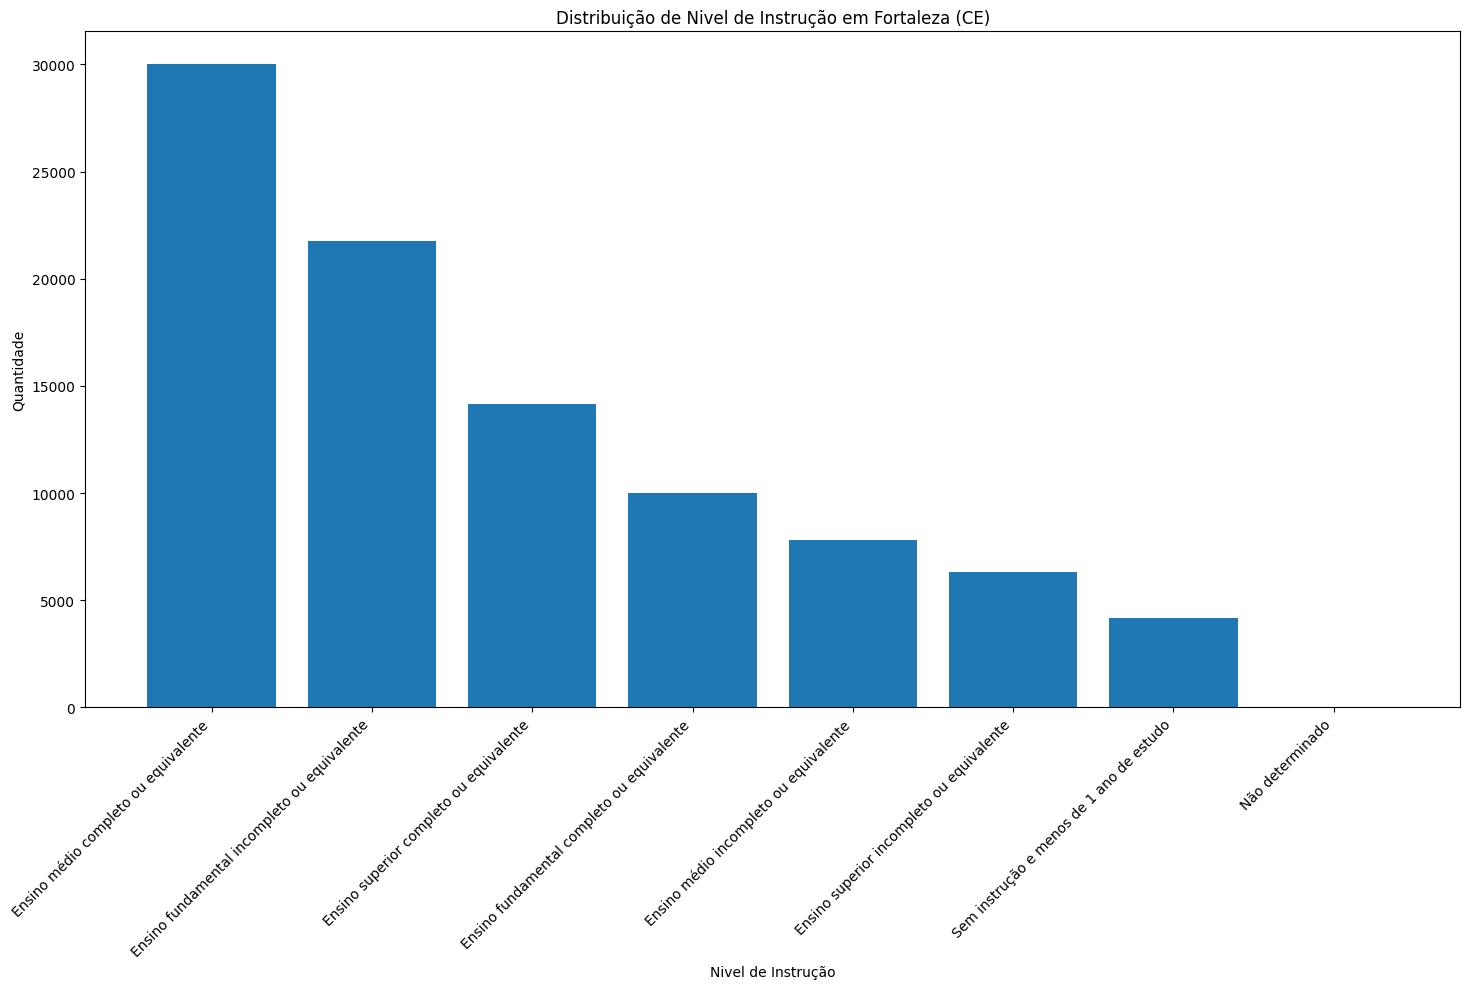

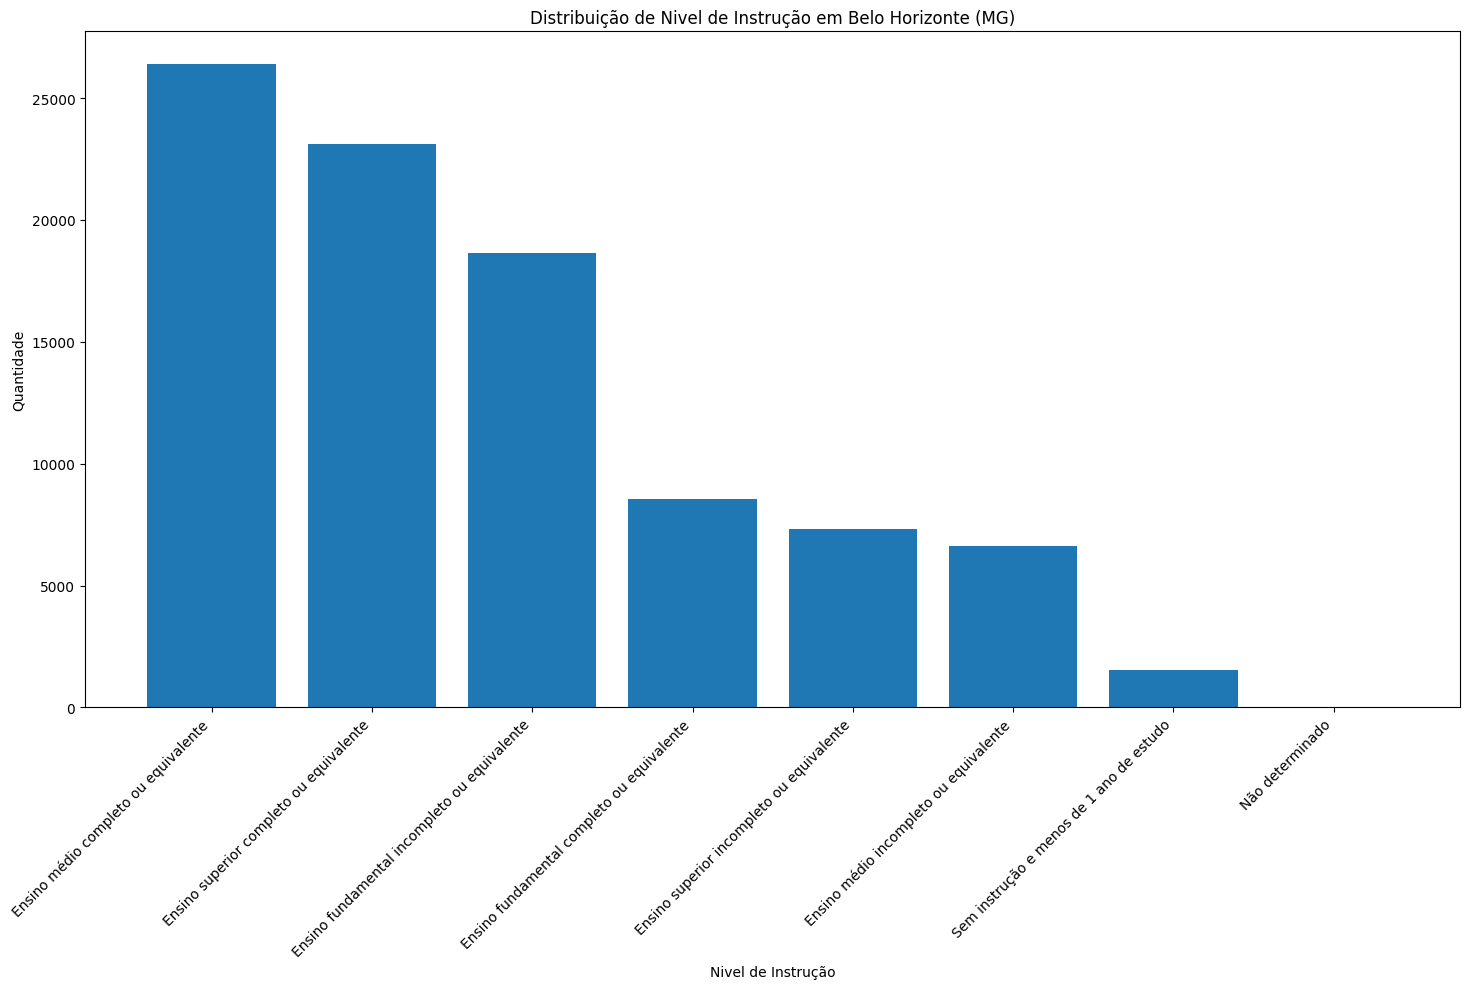

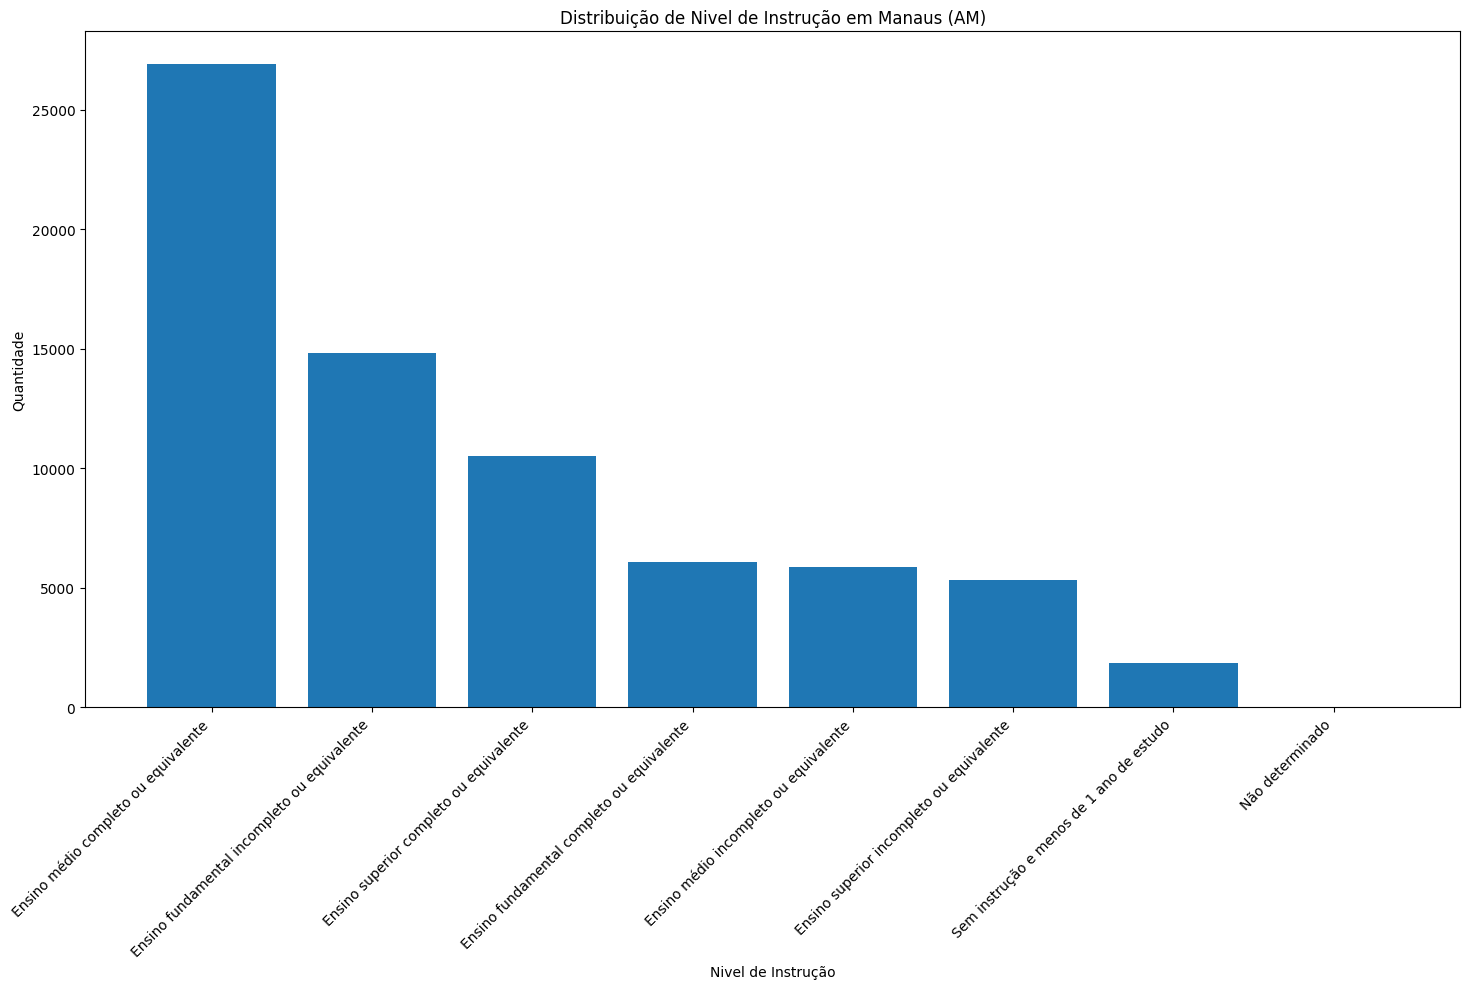

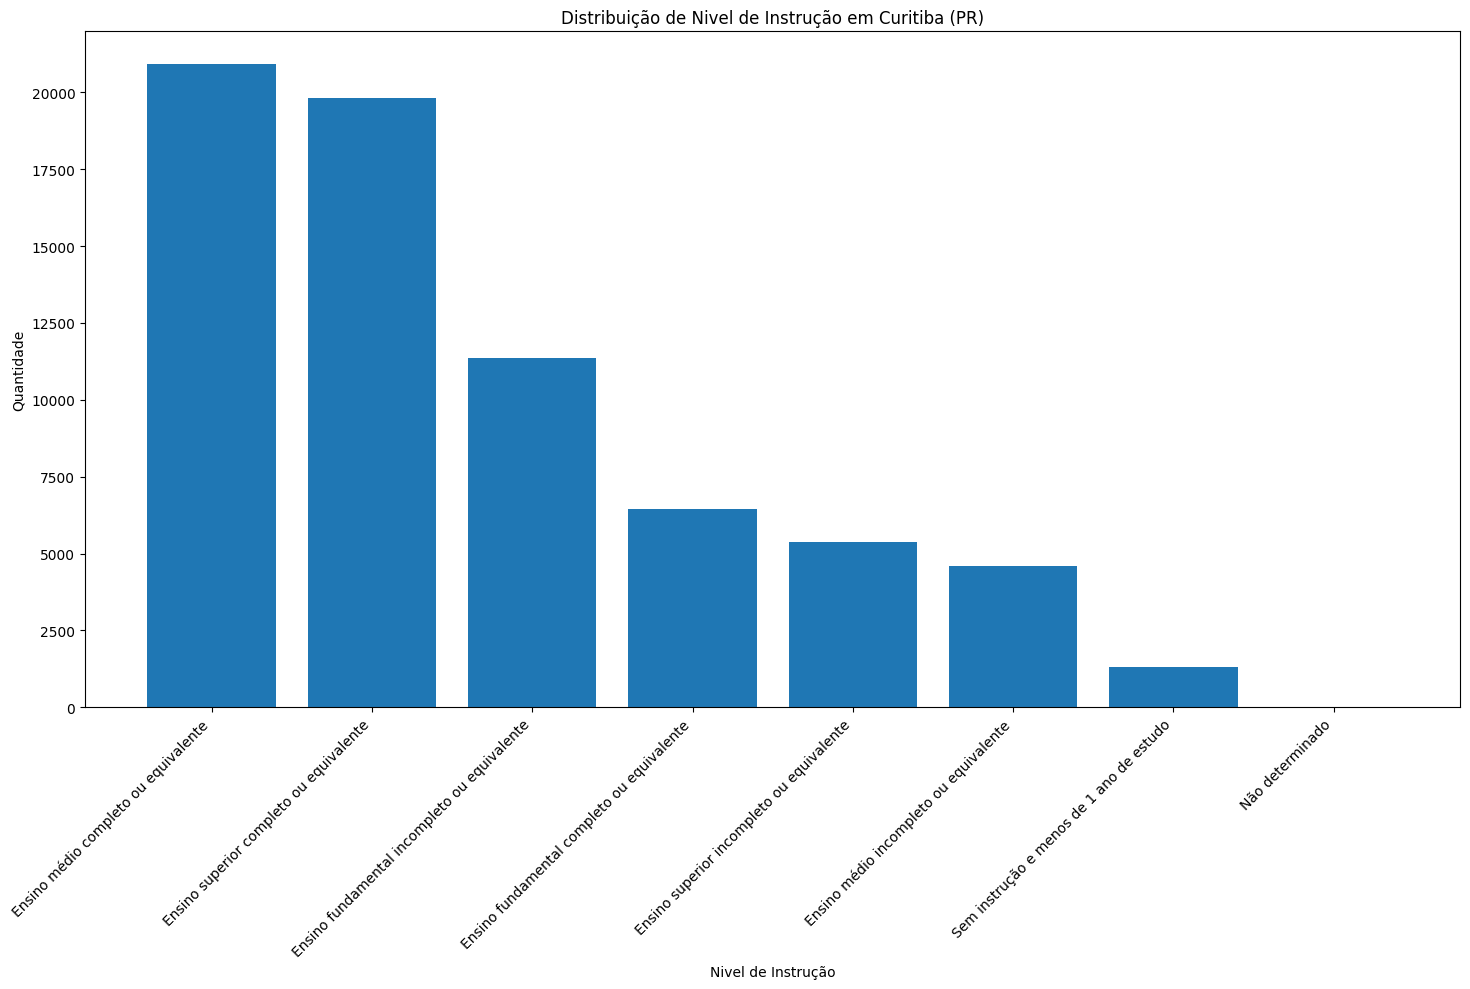

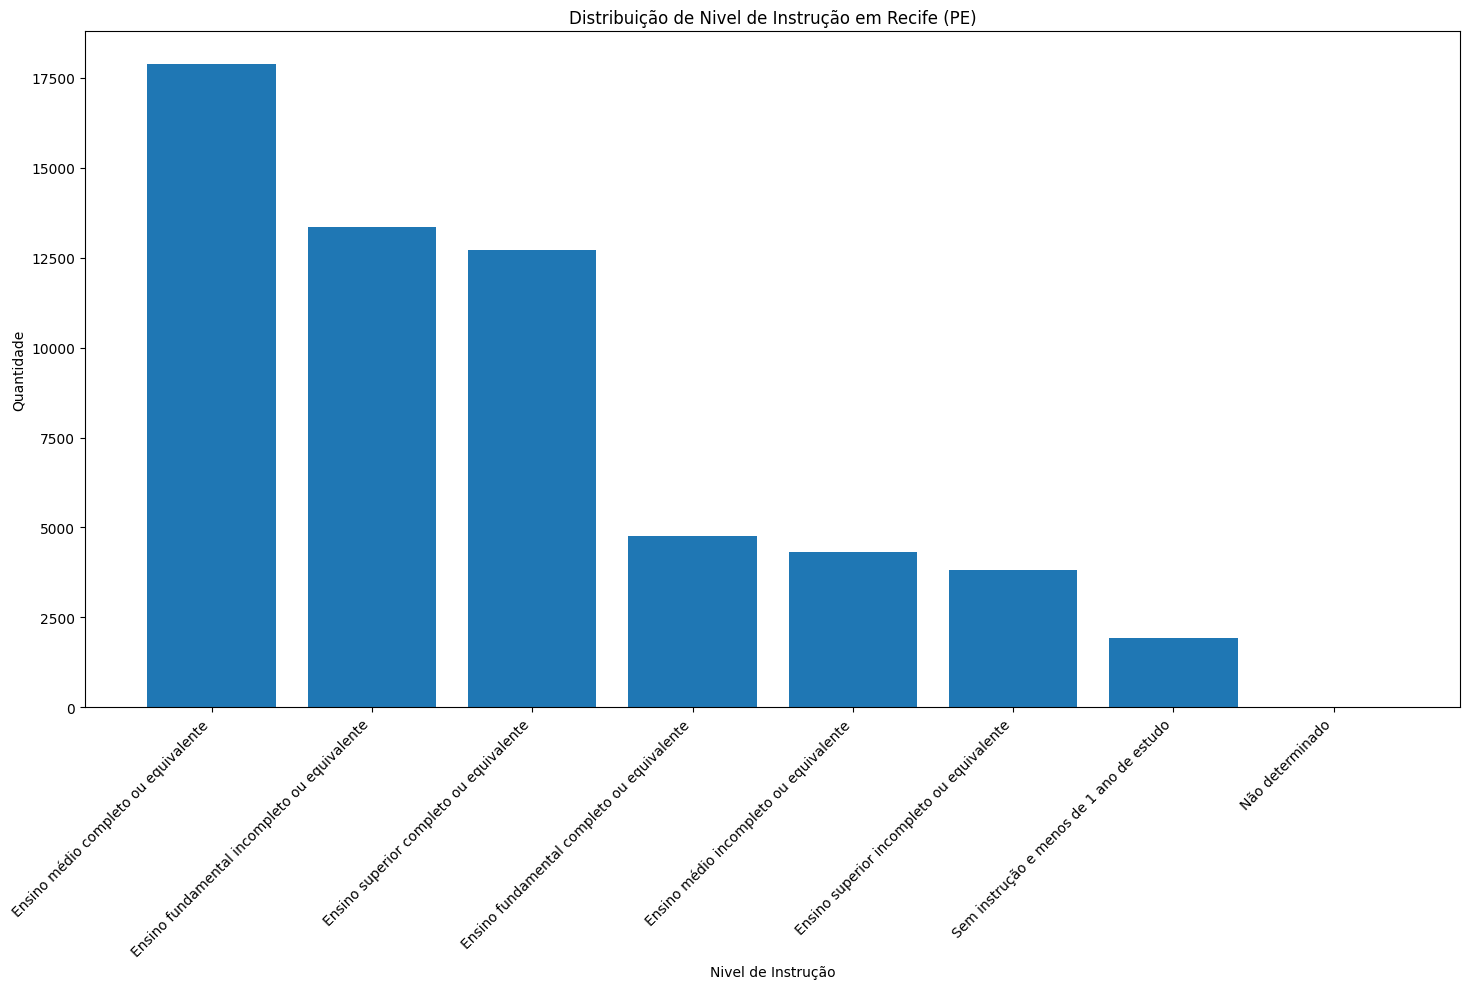

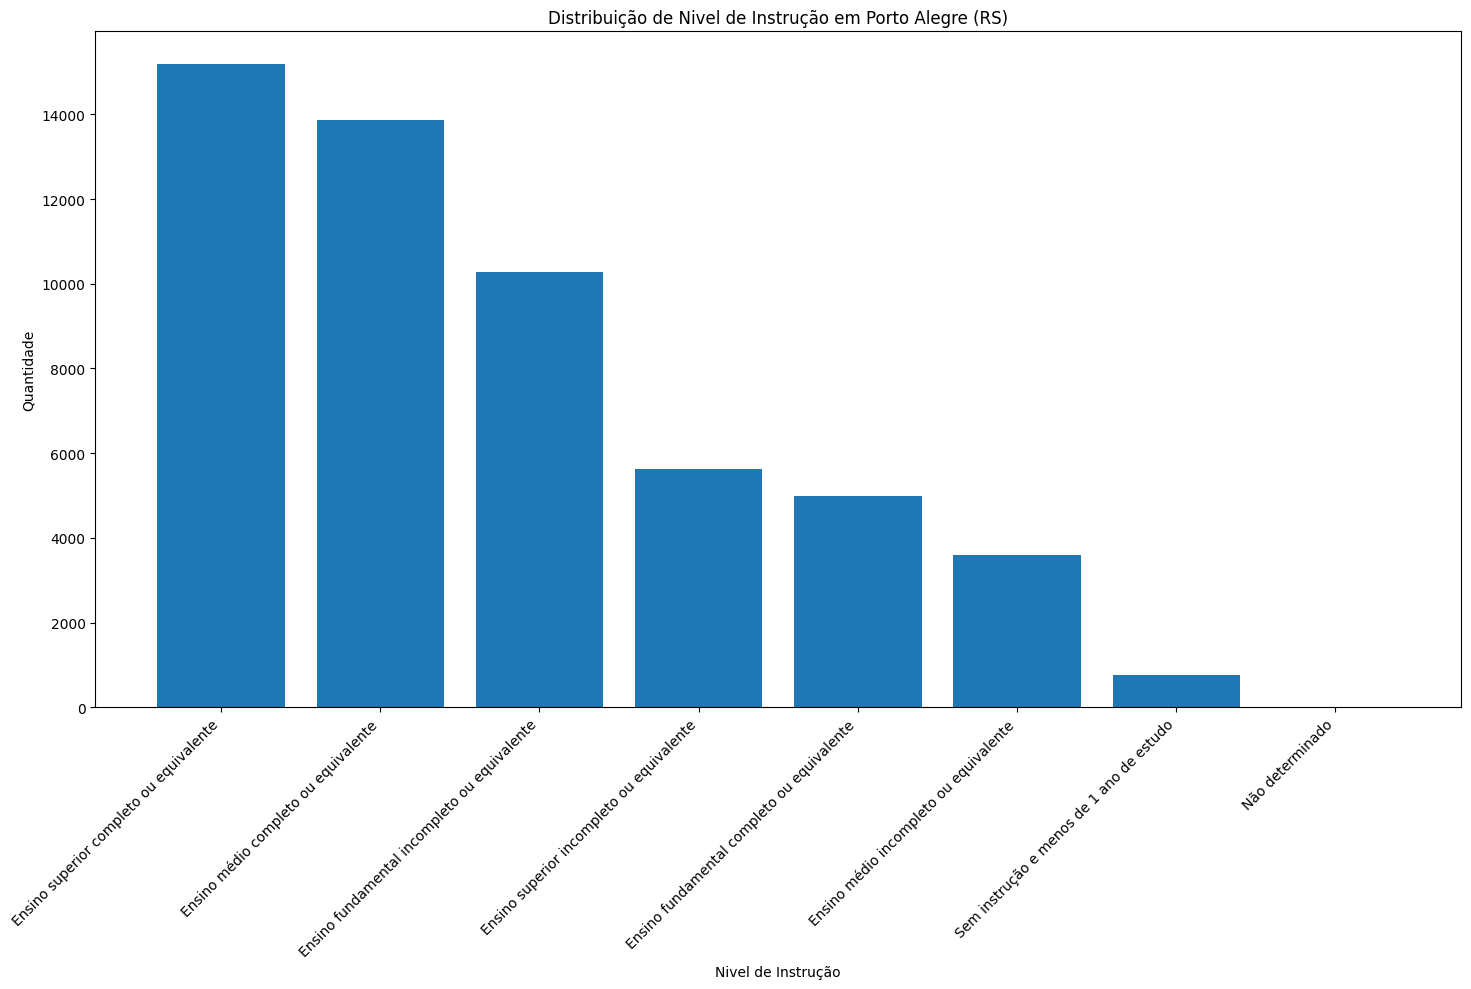

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtém os 10 municípios com mais ocorrências
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
maiores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=False).head(10)['municipio'].tolist()

# Itera pelos municípios e cria um gráfico para cada um
for municipio in maiores_ofensores:
    # Filtra os dados para o município atual
    dados_municipio = tabela[tabela['municipio'] == municipio]

    # Agrupa por "Ocupação no trabalho" e soma as quantidades
    dados_agrupados_ocupacao = dados_municipio.groupby('Nivel de Instrução')['quantidade'].sum().reset_index()

    # Ordena por quantidade em ordem decrescente
    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    # Cria o gráfico de barras
    plt.figure(figsize=(15, 10))
    plt.bar(dados_agrupados_ocupacao['Nivel de Instrução'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Nivel de Instrução')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Nivel de Instrução em {municipio}')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
    plt.show()

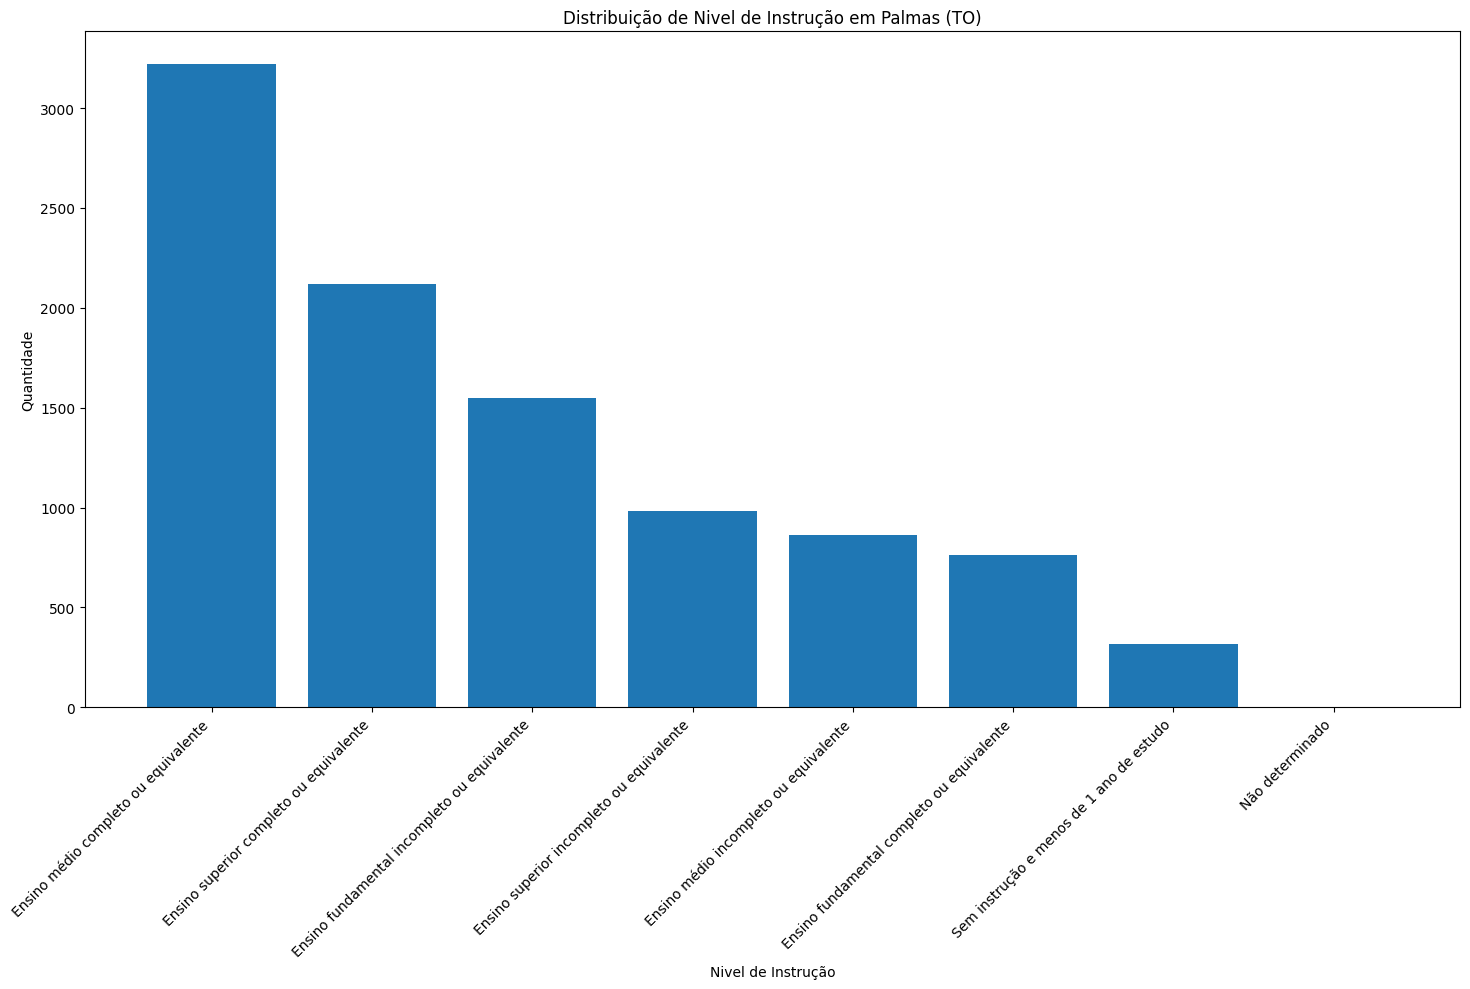

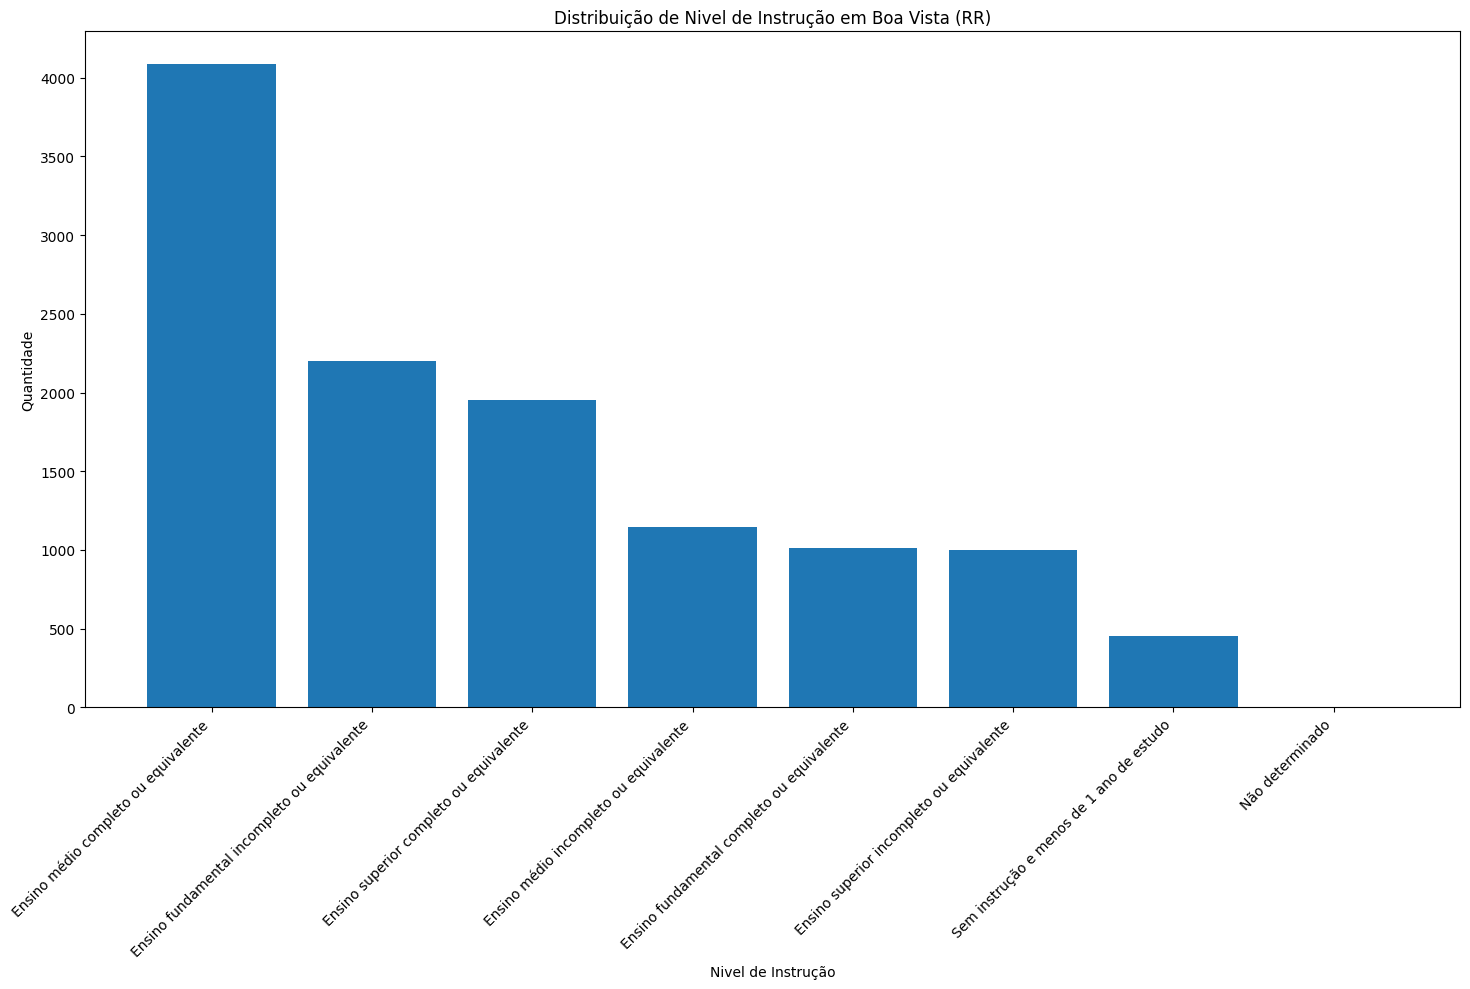

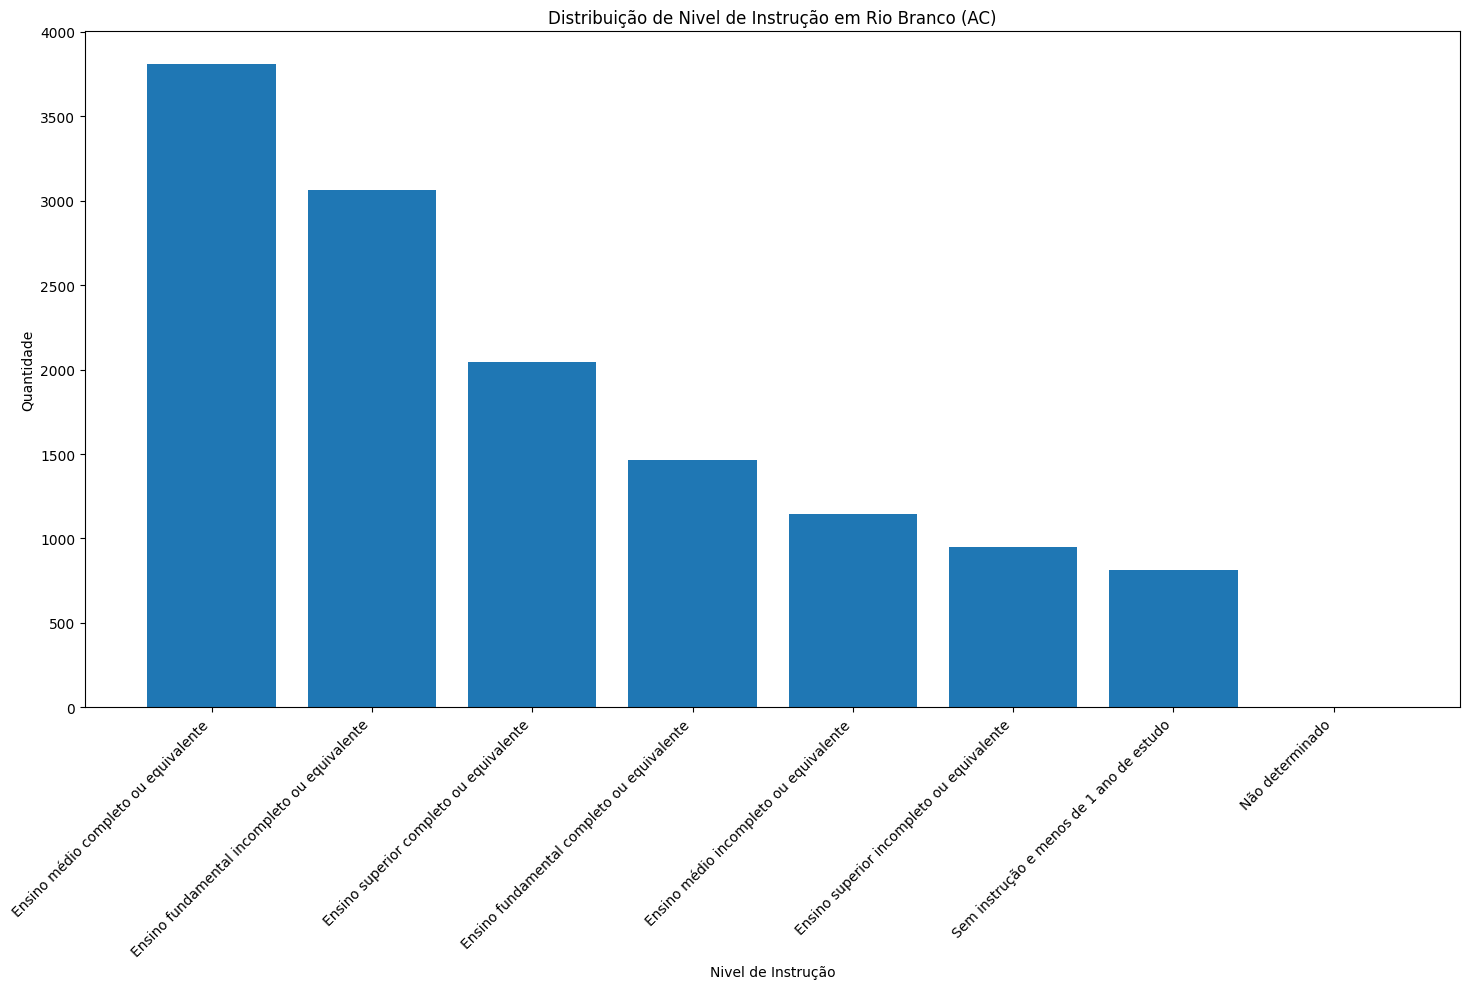

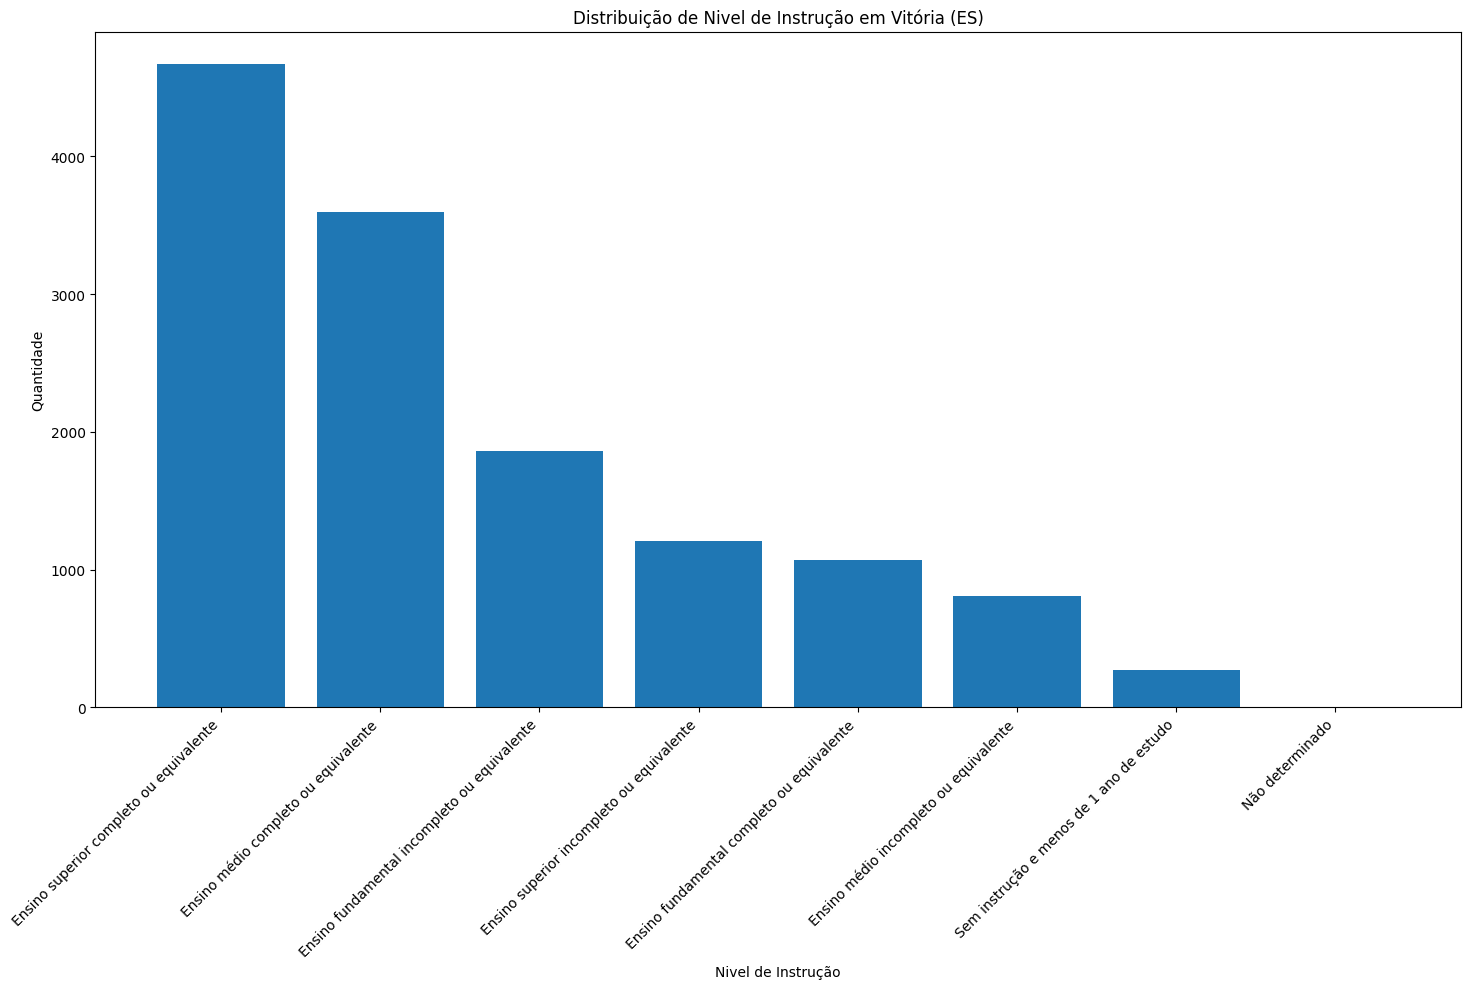

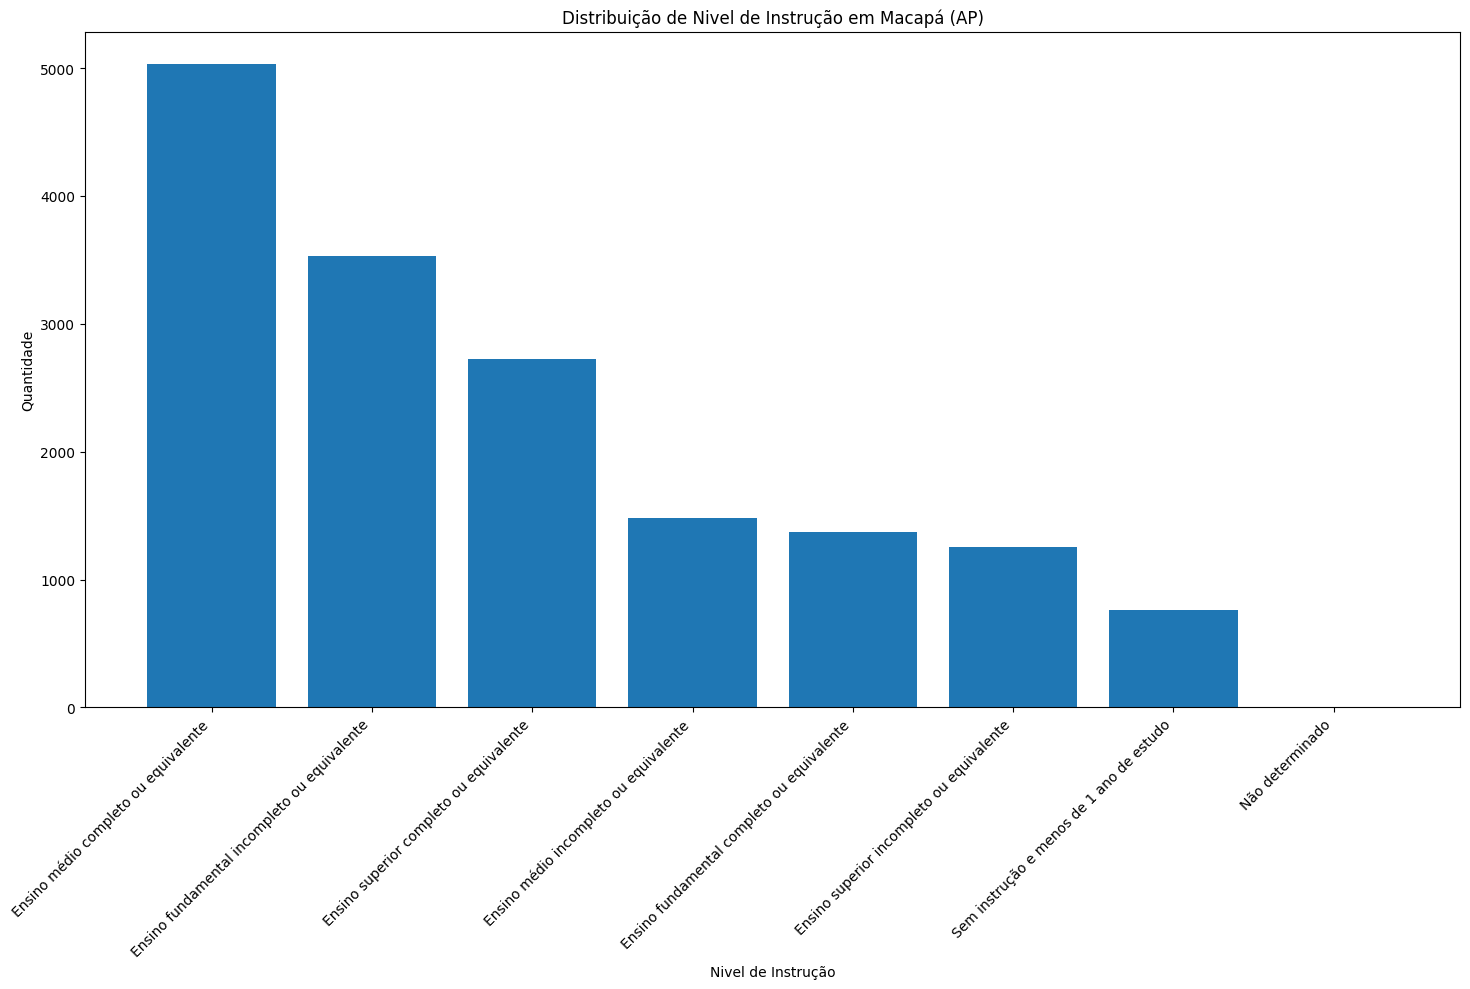

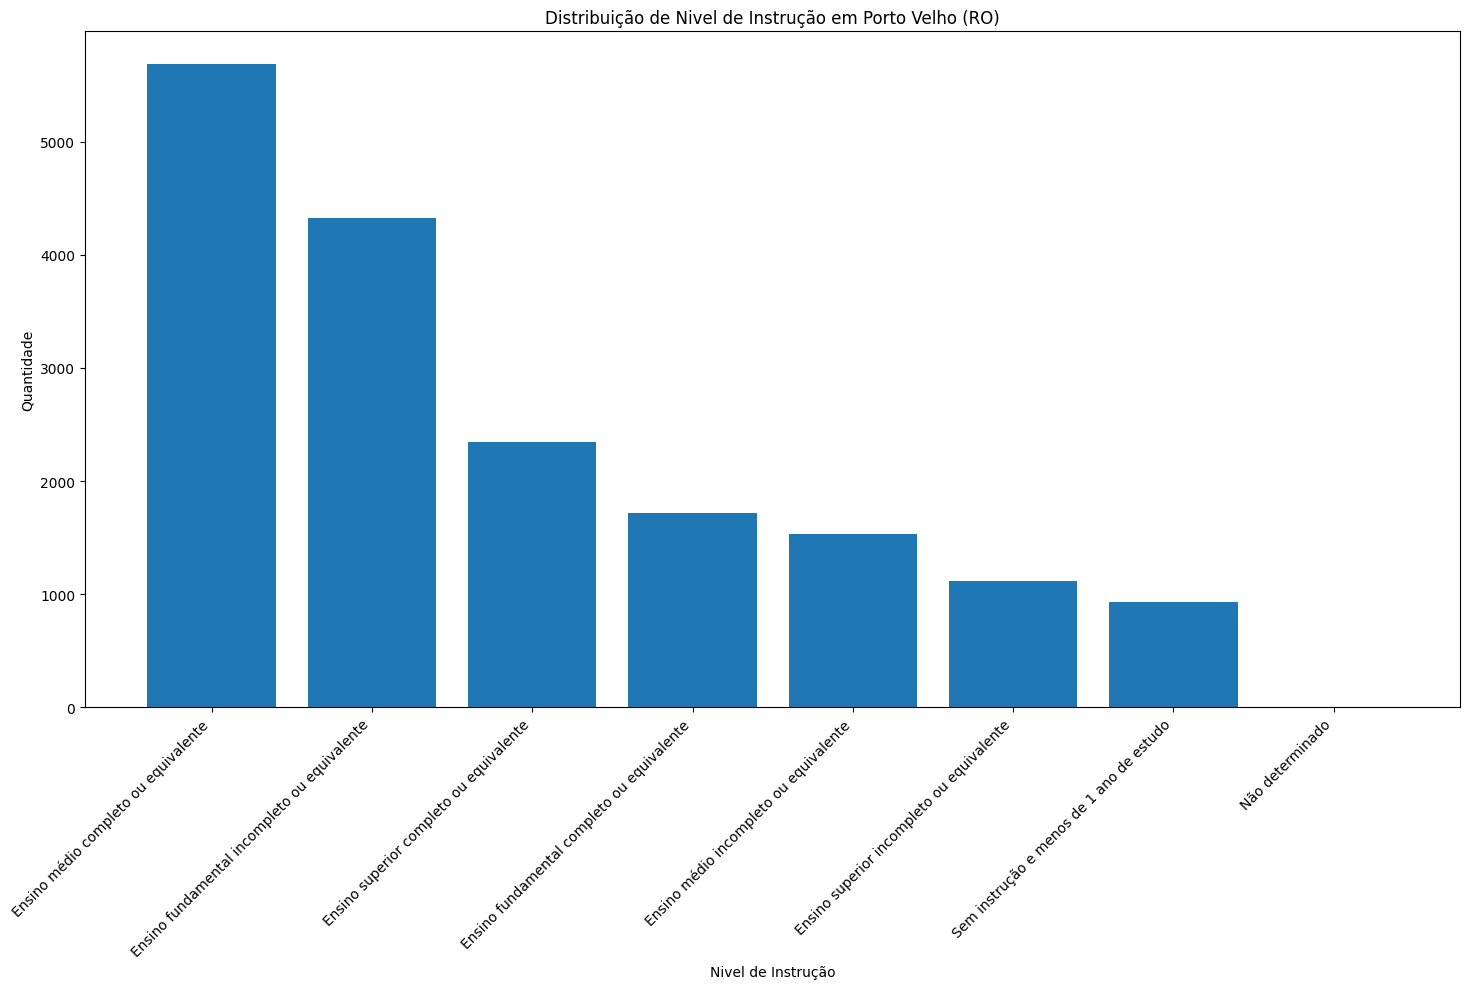

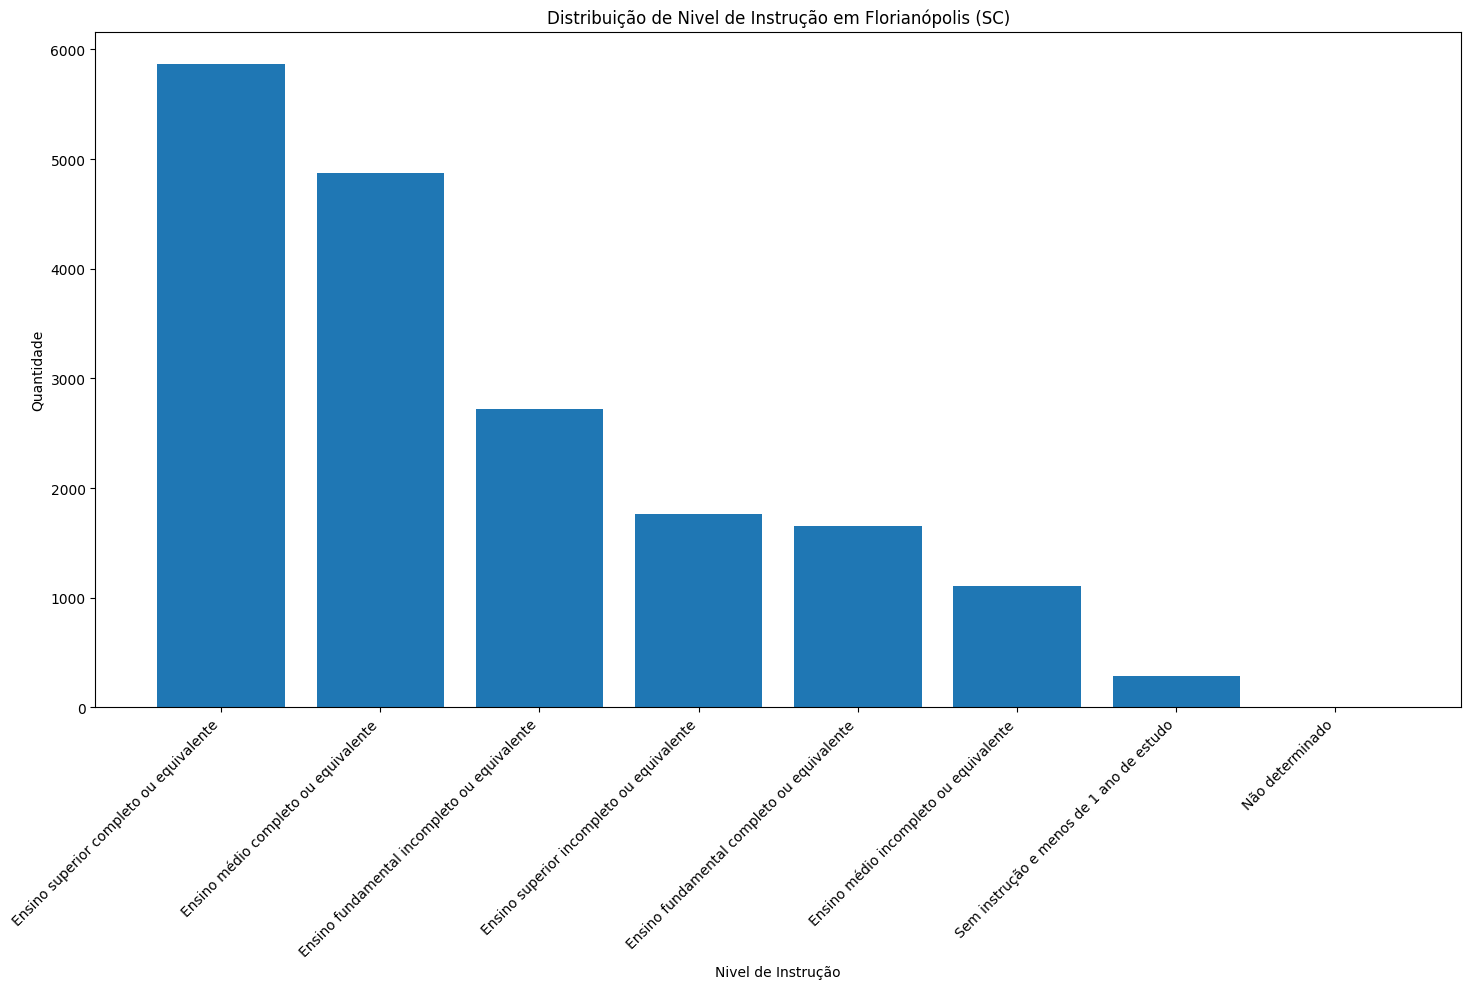

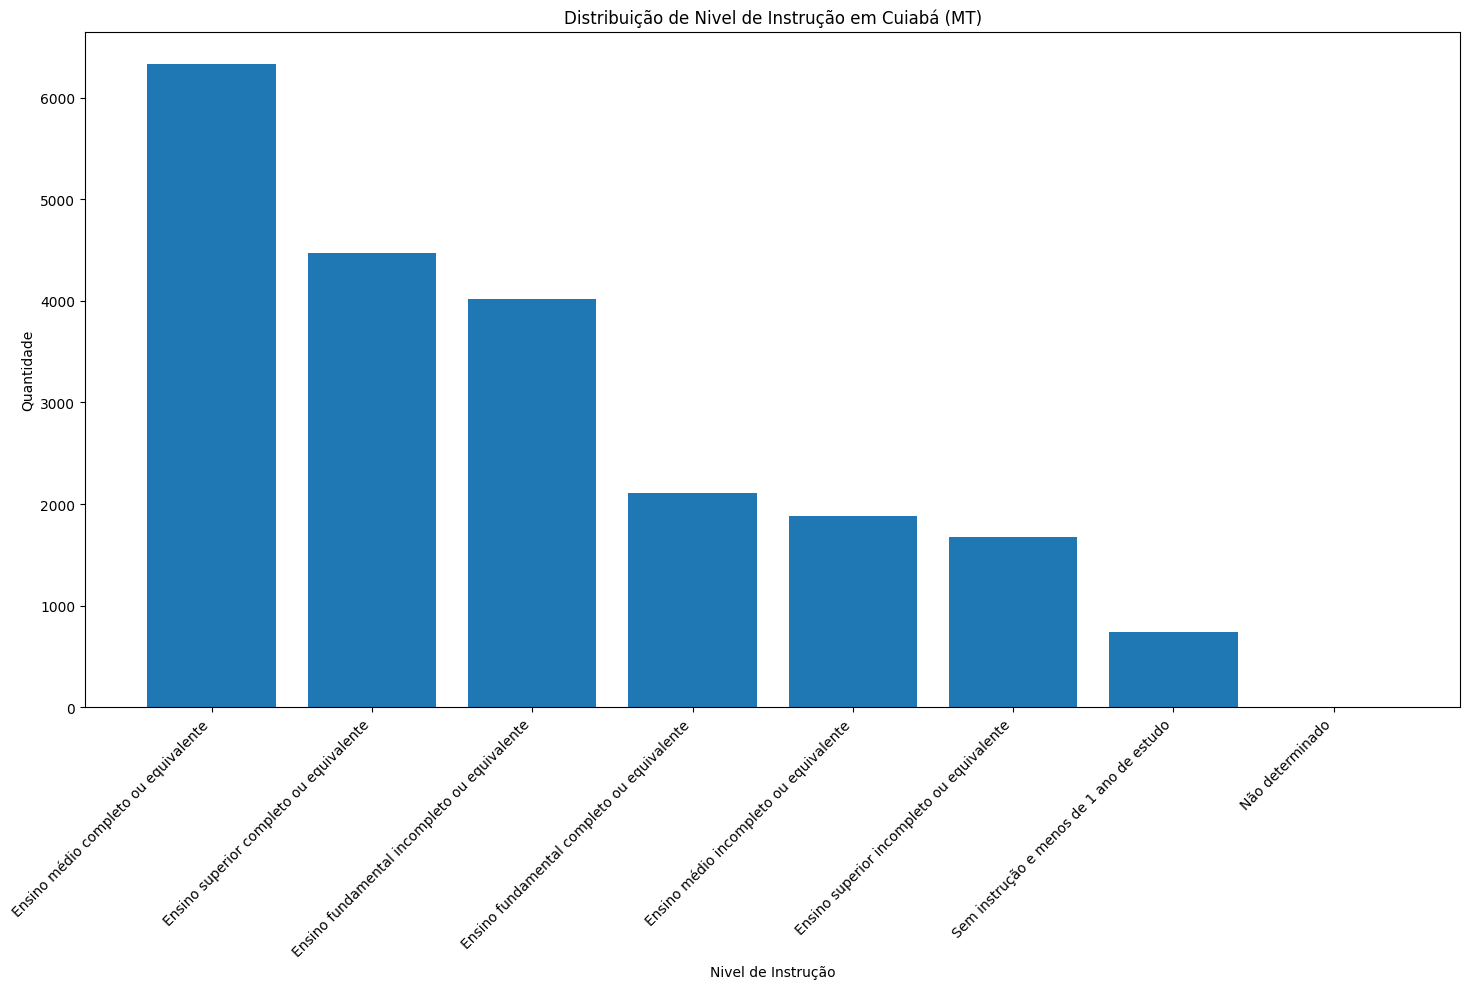

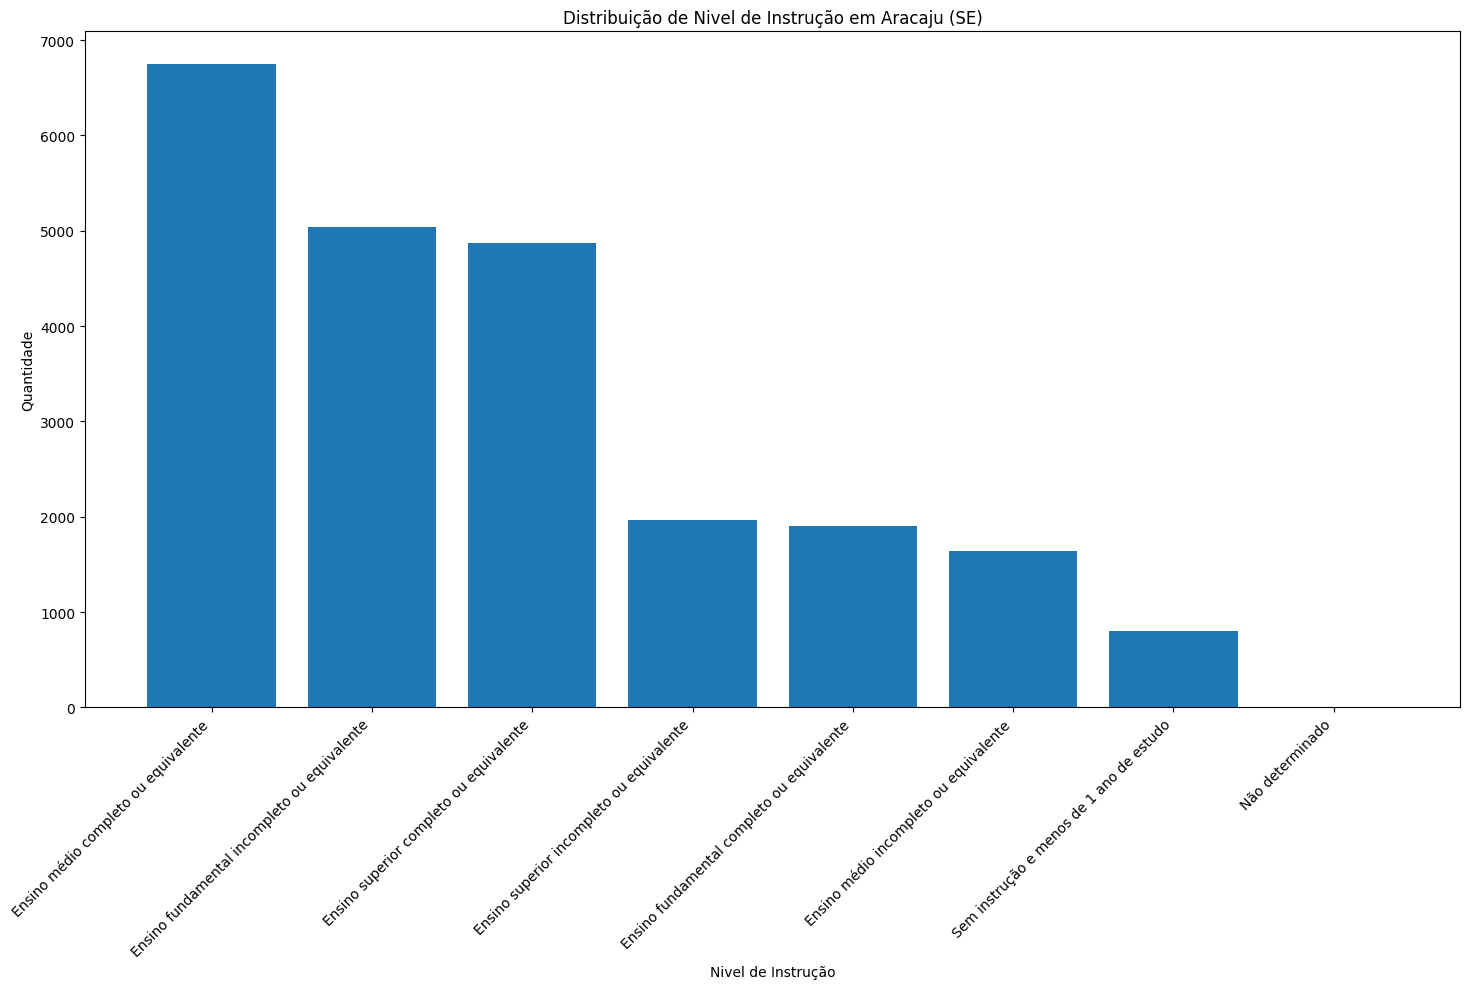

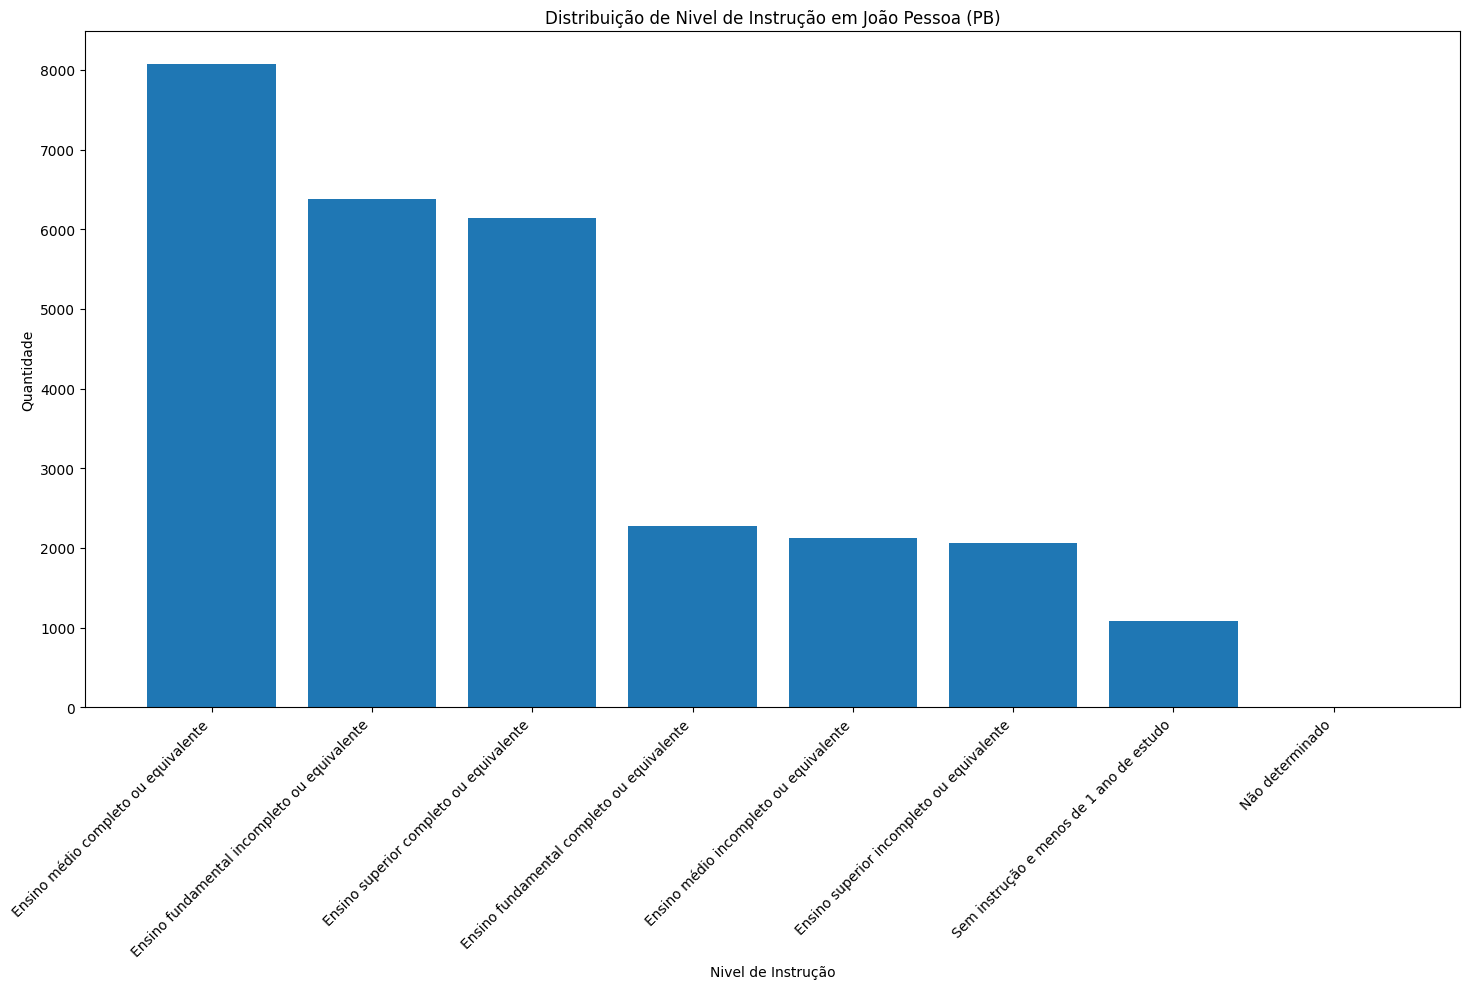

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtém os 10 municípios com MENOS ocorrências
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
menores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=True).head(10)['municipio'].tolist()  # ascending=True para ordem crescente

# Itera pelos municípios e cria um gráfico para cada um
for municipio in menores_ofensores:
    # Filtra os dados para o município atual
    dados_municipio = tabela[tabela['municipio'] == municipio]

    # Agrupa por "Ocupação no trabalho" e soma as quantidades
    dados_agrupados_ocupacao = dados_municipio.groupby('Nivel de Instrução')['quantidade'].sum().reset_index()

    # Ordena por quantidade em ordem decrescente (opcional, mas pode ser útil para visualização)
    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    # Cria o gráfico de barras
    plt.figure(figsize=(15, 10))
    plt.bar(dados_agrupados_ocupacao['Nivel de Instrução'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Nivel de Instrução')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Nivel de Instrução em {municipio}')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
    plt.show()